# M2 | Exploration Notebook

In this notebook, you will do a first exploration of the data set that you will use for your project. One part of this exploration is guided, i.e. we will ask you to solve specific questions (task 1-3). The other part is open, i.e. we will ask you to come up with your own exploration ideas (task 4). 

Please upload your solved notebook to Moodle (under Milestone 2 Submission)adding your SCIPER number in title, example: m2-lernnavi-456392.ipynb


## Brief overview of Lernnavi
[Lernnavi](https://www.lernnavi.ch) is an instrument for promoting part of the basic technical study skills in German and mathematics.


For the guided part of the exploration we will focus on the three main tables:
* *users*: demographic information of users.
* *events*: events done by the users in the platform.
* *transactions*: question and answer solved by user.

### Users
* user_id: unique identifier of user in database.
* gender: only three values: M male, F female or missing (star). 
* canton: swiss canton.
* class_level: school year in swiss system.
* study: boolean variable. True if the student participated in the study.
* class_id: identifier of student’s class (only for the students in the experiment)


### Events
* event_id: unique identifier of event in database.
* user_id: user who peformed the event.
* event_date: timestamp of event.
* category: classification of action (task, general, statistics, etc).
* action: type of action performed.
* event_type: whether the students viewed or clicked in the event.
* transaction_token: used to link to transactions table.
* tracking_data: optional content associated to this event (e.g., the new points mastered for a topic).
* session_id: session during which the event took place.
* topic_id: the topics represent the taxonomy of categories shown in the Deutsch and Math dashboard. See topics_translated table.
* session_closed: whether the session has been finished (1: finished; 0: not finished).
* session_type: whether the session is a learn or level check (1: learn; 2: level check).
* session_accepted: whether the user finally accepted the result of the session (1: accepted; 0: refused).

### Transactions
* transaction_id: unique identifier of transaction in database.
* transaction_token: used to link to events table.
* user_id: user who performed the transaction.
* document_id: document that was answered in transaction.
* document_version: version of document that was answered.
* evaluation: whether the user answered correctly or not. It is possible that it was only partially right. 
* input: answer the user gave.
* start_time: timestamp of when the user started answering.
* commit_time: timestamp of when the user submitted the answer.
* user_agent: the browser that the user used.
* solution: solution to question.
* type: type of question that was answered. 
* session_id: session during which the event took place.
* topic_id: the topics represent the taxonomy of categories shown in the Deutsch and Math dashboard. See topics_translated table.
* session_closed: whether the session has been finished (1: finished; 0: not finished).
* session_type: whether the session is a learn or level check (1: learn; 2: level check).
* session_accepted: whether the user finally accepted the result of the session (1: accepted; 0: refused).
* challenge: (boolean) whether the transaction was part of a challenge or not. Professors can create challenges containing different documents
* challenge_id: unique identifier of challenges. The same challenge can be done by multiple students. The pre-test and post-test in the study were designed like challenges.
* challenge_order: within the challenge, the order of the questions. The order matters because sometimes the questions were adapted depending on the student’s knowledge.
* challenge_name: name given to the challenges. 

## Useful Metadata Files
* [Data description](https://docs.google.com/document/d/1NPFNwi79JddrxZM-CpltH5nHro5btHRSNnYcAGj7Y0A/edit?usp=sharing)


In [5]:
# Import the tables of the data set as dataframes.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = './data' #You many change the directory

users = pd.read_csv('{}/users.csv.gz'.format(DATA_DIR))
events = pd.read_csv('{}/events.csv.gz'.format(DATA_DIR))
transactions = pd.read_csv('{}/transactions.csv.gz'.format(DATA_DIR))

## Task 1: Simple Statistics

In this task you are asked to do a first coarse exploration of the data set, using simple statistics and visualizations.

#### a) How many distinct participants do we have in the transactions table?


In [ ]:
# Your code goes here
distinct_particiners = transactions['user_id'].nunique()
print('The total nb of distinct users is: ', distinct_particiners)

The total nb of distinct users is:  22470


#### b) How many transactions did each user do? Please provide a visualization and discuss the distribution.

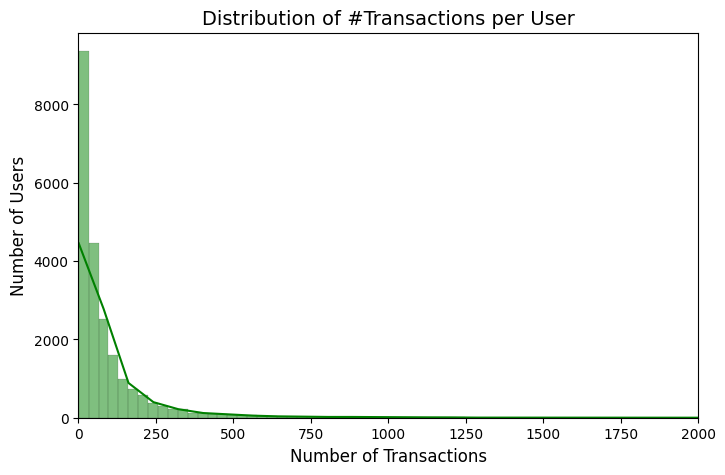

In [57]:
import seaborn as sns

# Your code goes here
transactions_per_user = transactions.groupby('user_id').size()
transactions_per_user.head()

plt.figure(figsize=(8, 5))
sns.histplot(transactions_per_user, bins=500, kde=True, color="green", edgecolor="black")
plt.xlim(0, 2000)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.title('Distribution of #Transactions per User', fontsize=14)
plt.show()

In [58]:
nb_of_users =  transactions['user_id'].nunique()

mean = transactions_per_user.sum() / nb_of_users

print(f"the number of users is {nb_of_users}, with the following mean {mean}")

the number of users is 22470, with the following mean 95.00485091232754


In [6]:
transactions.head( )

,transaction_id,transaction_token,user_id,document_id,document_version,evaluation,input,start_time,commit_time,user_agent,...,type,session_id,topic_id,session_closed,session_type,session_accepted,challenge,challenge_id,challenge_order,challenge_name
0,688413,88fdcaad-f73b-46a2-b561-d262f2441442,393211,awd0i1DlVtg6kuMZSkpmHa,75002,PARTIAL,"{""type"": ""MULTI_COLOR_HIGHLIGHT"", ""highlighted...",2021-05-21 07:58:27.312000000,2021-05-21 08:03:43.020000000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,...,MULTI_COLOR_HIGHLIGHT,NaN,NaN,NaN,NaN,NaN,True,1083.0,2.0,G3h – Training Rhetorik
1,688414,a75eb7b4-b2c2-47d4-9200-27980c175037,393211,arhWF3BT53V9W8cGOaZVPX,75012,PARTIAL,"{""type"": ""MULTI_COLOR_HIGHLIGHT"", ""highlighted...",2021-05-21 08:04:05.067000000,2021-05-21 08:07:21.288999936,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,...,MULTI_COLOR_HIGHLIGHT,NaN,NaN,NaN,NaN,NaN,True,1083.0,3.0,G3h – Training Rhetorik
2,688415,61eb829d-bdda-4107-86af-ad9a14a7bdc9,393211,9wk5dtV2mF59odW0wCEYYc,75003,PARTIAL,"{""type"": ""CLOZE_TEXT"", ""clozeInputs"": [""Person...",2021-05-21 08:07:37.048000000,2021-05-21 08:13:30.953999872,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,...,CLOZE_TEXT,NaN,NaN,NaN,NaN,NaN,True,1083.0,4.0,G3h – Training Rhetorik
3,688416,30ff0d8a-865d-460b-9177-b698a52b0d5c,393211,afilxZ8LycP5LReULeKngW,75009,CORRECT,"{""type"": ""DND_PAIRS"", ""input"": [""<p>Ich gehe i...",2021-05-21 08:13:38.943000000,2021-05-21 08:22:13.975000064,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,...,DND_PAIRS,NaN,NaN,NaN,NaN,NaN,True,1083.0,5.0,G3h – Training Rhetorik
4,688417,0adedf3b-ba35-4497-8c6b-b5c2f6fcbbf3,393211,76m6v05NCeX8x2Wr5tKRE3,75007,CORRECT,"{""type"": ""DND_PAIRS"", ""input"": [""<p>Kleiner Ma...",2021-05-21 08:22:19.391000000,2021-05-21 08:22:55.366000128,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,...,DND_PAIRS,NaN,NaN,NaN,NaN,NaN,True,1083.0,6.0,G3h – Training Rhetorik


## Discussion

x-axis: number of transactions
y-axis: number of users

The number of users decreases rapidly as the number of transactions increases, forming a heavy-tailed distribution. This suggests that while most users perform a small number of transactions, a few highly active users contribute significantly to the total volume of transactions.

The number of transactions per user shows a decreasing trend, suggesting a potential Poisson-like decay. However, the presence of a heavy tail might indicate overdispersion, meaning a Negative Binomial distribution could be a better fit.

The plot indicated that the frequency of transactions decreases exponentially with the number of transactions. 

#### c) Which are the 8 most popular event actions? Please provide a visualization of the frequency of the top 8 event actions.

Hint: See actions in table events.

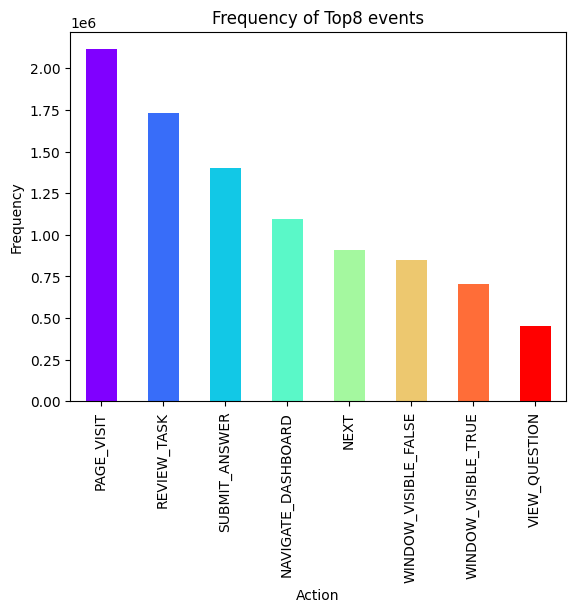

In [59]:
# Your code goes here
top_8 = events['action'].value_counts().head(8)  
colors = plt.cm.rainbow(np.linspace(0, 1, len(top_8)))

top_8.plot(kind='bar', color=colors)

plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Frequency of Top8 events')
plt.show()


# Discussion 
This visualization provides insights into user behavior within the platform. This bar chart displays the frequency of the top 8 user events, with PAGE_VISIT being the most common action. This suggests that a new PAGE_VISIT event is likely triggered every time a user navigates within the platform.

The lower frequency of VIEW_QUESTION compared to SUBMIT_ANSWER suggests that users may: 
    
    - Spend more time answering rather than frequently revisiting the question.
    - Have multiple answer submissions per question without reloading the view.

UI interactions like NAVIGATE_DASHBOARD, NEXT, and WINDOW_VISIBLE events are notably less frequent than task-related events. 

We could indindify the page_load as something to optimize, maybe cache some pages at the users side to reduce the page visits on the appications side. 

## Task 2: Static Analysis

In this second task, you will do a univariate an multivariate exploration of some aggregated features.

#### a) Build a data frame containing one row per user:

``[user_id, gender, num_pages_visited, num_feedback, percentage_correct, num_clicks]``


The features are defined as follows:

- **num_pages_visited**: total number of pages a student visited 

- **num_feedback**: total number of times the student opened the feedback

- **percentage_correct**: number of correct answers/total number of answers (hint: evaluation = correct). If desired, you may assign a weight of 0.5 to partially correct answers. 

- **num_clicks**: total number of click events (hint: event_type = CLICK)

In [60]:
# number of pages visited per user
num_pages_visited = (
    events[events["action"] == "PAGE_VISIT"]    # Filter for PAGE_VISIT actions
    .groupby("user_id")                         # Group by user_id
    .size()                                     # Count occurrences in group 
    .reset_index(name="NUM_PAGE_VISIT")      # Convert to DataFrame and rename column
)

# number of feedback per user
num_feedback_per_user = (
    events[events["action"] == "OPEN_FEEDBACK"] # Filter for PAGE_VISIT actions
    .groupby("user_id")                         # Group by user_id
    .size()                                     # Count occurrences in group 
    .reset_index(name="NUM_OPEN_FEEDBACK")      # Convert to DataFrame and rename column
)

# num correct 
num_transaction_correct = (
    transactions[transactions["evaluation"] == "CORRECT"] 
    .groupby("user_id")                       
    .size()                                     
    .reset_index(name="NUM_CORRECT")     
)

# total number of evaluations per user 
num_transaction_total = (
    transactions[transactions["evaluation"].notna()] # We did not include the nan answers
    .groupby("user_id")                       
    .size()                                     
    .reset_index(name="NUM_TOTAL")      
)

# Merge both DataFrames
percentage_correct = num_transaction_total.merge(num_transaction_correct, on="user_id", how="left")

# Compute percentage
percentage_correct["PERCENTAGE_CORRECT"] = percentage_correct["NUM_CORRECT"] / percentage_correct["NUM_TOTAL"]

# Compute nb of clicks per user 
num_clicks_per_user = (
    events[events["event_type"] == "CLICK"] 
    .groupby("user_id")                       
    .size()                                     
    .reset_index(name="NUM_CLICKS")      
)

df_static_analysis = users.merge(num_pages_visited, on="user_id", how="left").merge(num_feedback_per_user, on="user_id", how="left").merge(percentage_correct, on="user_id", how="left").merge(num_clicks_per_user, on="user_id", how="left")

df_static_analysis = df_static_analysis.drop(columns=["canton", "class_level", "class_id", "study", "NUM_TOTAL", "NUM_CORRECT"])
df_static_analysis.head()


,user_id,gender,NUM_PAGE_VISIT,NUM_OPEN_FEEDBACK,PERCENTAGE_CORRECT,NUM_CLICKS
0,387604,NaN,1341.0,46.0,0.488889,1408.0
1,387605,NaN,862.0,78.0,0.420168,959.0
2,387608,NaN,716.0,11.0,0.815789,516.0
3,387613,NaN,37.0,NaN,1.000000,38.0
4,387615,MALE,211.0,1.0,0.714286,109.0


b) Perform a univariate analysis (including descriptive statistics and visualizations) for the five features (gender, num_pages_visited, num_feedback, percentage_correct, num_clicks) of your dataframe. Please check the lecture slides regarding information on how to perform a univariate analysis for categorical and numerical features. Discuss your results: how are the features distributed? Are there any anomalities?

In [61]:
def get_feature_stats(df):
    """
    Obtains descriptive statistics for all features and percentage of missing 
    values
    
    Parameters
    ----------
    df : DataFrame
         Containing all data

    Returns
    -------
    stats : DataFrame
            Containing the statistics for all features.
                   
    """
    ### BEGIN SOLUTION
    numerical = df.describe(include= ['float64'])
    categorical = df.describe(include= ['object'])
    stats = pd.concat([numerical, categorical])
    #stats = df.describe(include= 'all') # alternative
    
    # Select the desired statistics
    stats = stats.loc[['mean', 'std', '50%', 'unique', 'top', 'freq']]

    return stats


In [62]:
stats = get_feature_stats(df_static_analysis)
stats

,NUM_PAGE_VISIT,NUM_OPEN_FEEDBACK,PERCENTAGE_CORRECT,NUM_CLICKS,gender
mean,95.353270,24.339469,0.486700,192.928654,NaN
std,134.276294,45.993965,0.194017,326.270371,NaN
50%,54.000000,9.000000,0.479486,92.000000,NaN
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,FEMALE
freq,NaN,NaN,NaN,NaN,15342


In [63]:
def plot_features(df, title="Feature Analysis", figsize=(15, 5)):
    """
    Plots all features individually in the same figure
    
    Parameters
    ----------
    df : DataFrame
        Containing all data
    title : str, optional
        Title for the figure
    figsize : tuple, optional
        Base size for the figure, will be adjusted based on number of rows
    """

    df = df.copy()
    continuous_cols = list(df._get_numeric_data().columns)
    categorical_cols = list(set(df.columns) - set(continuous_cols))
    
    # Calculate number of rows and columns needed for subplots
    n_features = len(df.columns)
    n_cols = min(3, n_features)  # Use fewer columns if there aren't enough features
    n_rows = (n_features + n_cols - 1) // n_cols  # Ceiling division
    
    # Adjust figure size based on actual number of plots
    figsize = (figsize[0], figsize[1] * n_rows)
    
    # Create only the number of subplots we actually need
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    
    # Handle the case when axes is not an array (single subplot)
    if n_features == 1:
        axes = np.array([axes])
    elif not isinstance(axes, np.ndarray):
        axes = np.array([axes])
    
    # Convert to flatten array for consistent indexing
    axes = axes.flatten()
    
    categorical_palette = "Set1"
    
    for i, col in enumerate(df.columns):
        ax = axes[i]
        data = df[~df[col].isna()]
        
        if col in continuous_cols:
            sns.histplot(data=data, x=col, bins=50, ax=ax, color="green", edgecolor="black")
        elif col in categorical_cols:
            sns.countplot(data=data, x=col, ax=ax, palette=categorical_palette)
        else:
            print(f"Column type not recognized: {col}")
    
    # Remove unused subplots entirely rather than just hiding them
    for j in range(n_features, len(axes)):
        fig.delaxes(axes[j])
    
    # Apply tight layout first
    plt.tight_layout()
    
    # Add title with proper spacing
    fig.suptitle(title, fontsize=16, fontweight="bold", y=1.02)
    
    return fig

/var/folders/0k/43ckgrhd7cd68vbpqrmw9r240000gn/T/ipykernel_10677/538417499.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, ax=ax, palette=categorical_palette)


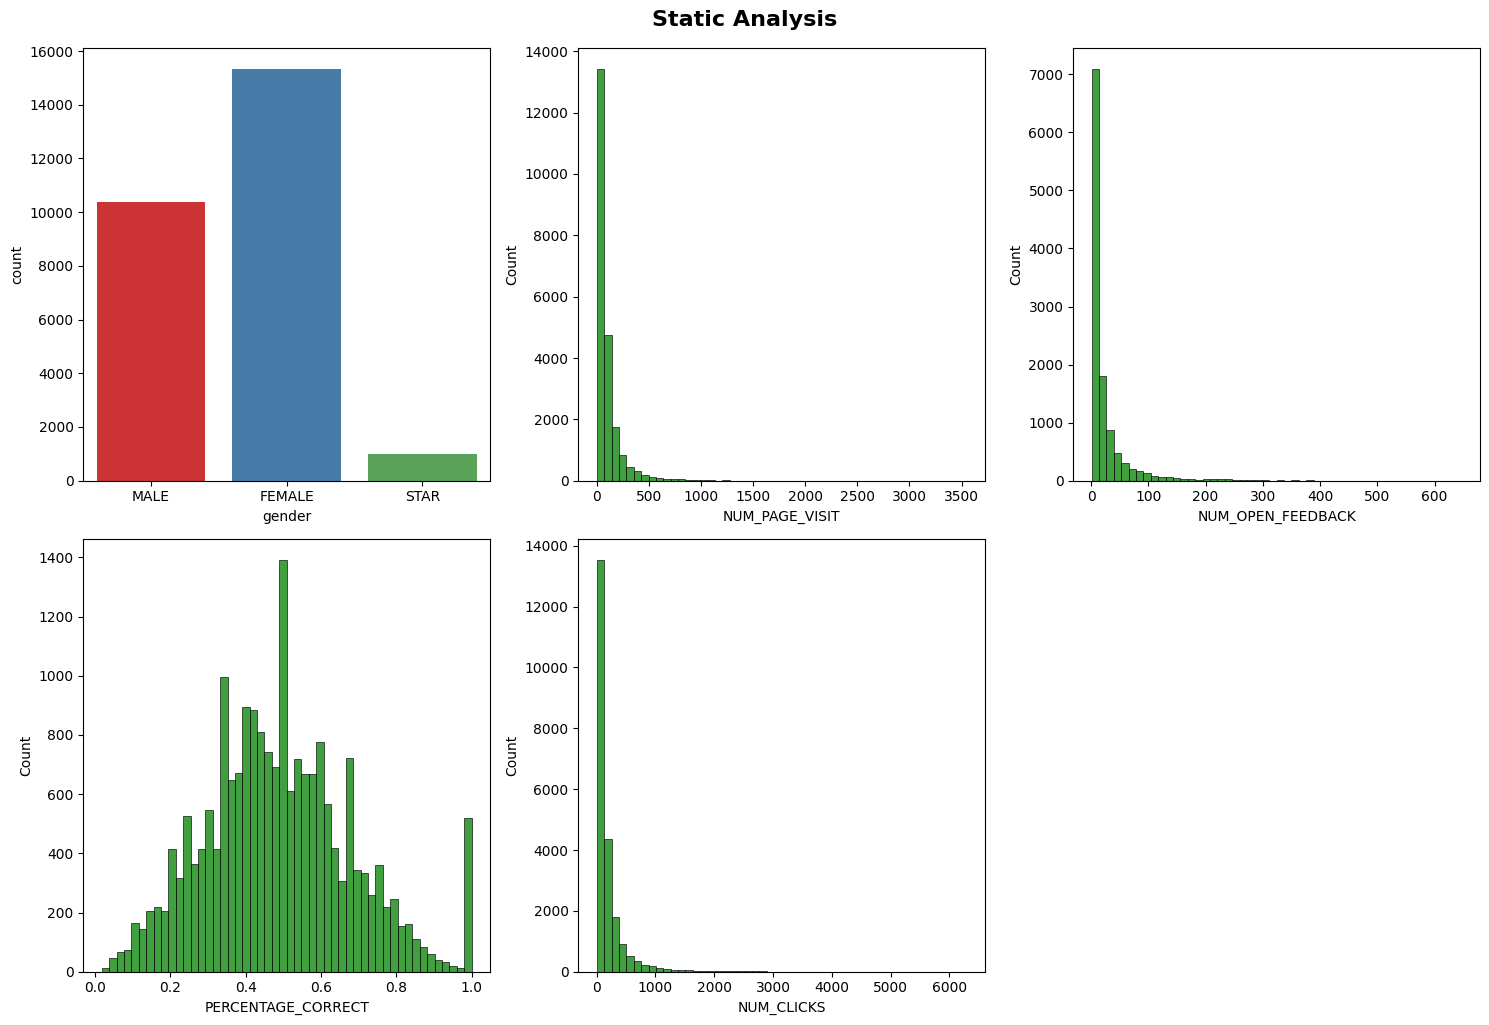

In [64]:
fig1 = plot_features(df_static_analysis.drop(columns=["user_id"]), "Static Analysis", figsize=(15, 5))


*Your discussion/interpretation goes here*

Discuss your results: how are the features distributed? Are there any anomalities?


1. Gender Distribution (categorical variable)

    - The majority of users are FEMALE (15,342 occurrences).
    - There are less users in the MALE category (aprox. 10200 occurences) 
    - STAR categories exist but is less frequent indicating some users do not indify as Male or Female or not want to disclose it.
    - The imbalance should be considered in any gender-based analysis to prevent biased interpretations.

2. NUM_PAGE_VISIT (Number of Page Visits) (numerical variable)

    - Mean: 95.35, Std Dev: 134.27, Median: 54 -> High variability
    - Skewness: Right-skewed (most users visit fewer pages, while a few visit a lot).
    - The distribution indicates that a majority of users visit only a limited number of pages, with a long tail showing a small subset of very active users.
    - The distribution is discrete. Suggesting a negative binominal distribution due to the high variabilty. 

3. NUM_OPEN_FEEDBACK (Number of Opened Feedbacks) (numerical variable)

    - Mean: 24.34, Std Dev: 45.99, Median: 9
    - This distribution is also right-skewed, suggesting that while most users open feedback occasionally, some engage with feedback frequently.
    - This metric could indicate user engagement with learning resources.
    - The distribution is discrete. Suggesting a negative binominal distribution due to the high variabilty. 

4. PERCENTAGE_CORRECT (Accuracy of Answers) (numerical variable)

    - Mean: 0.487 (48.7% correct answers), Std Dev: 0.19
    - The histogram appears normally distributed, with a slight bias towards 0.5.
    - Bimodal peaks (if visible) could suggest different user groups, such as high-performing vs. low-performing users.
    - The peak at 1.0 (100% correct) indicates that some users achieve perfect scores, while others struggle.

5. NUM_CLICKS (Number of Clicks) (numerical variable)

    - Mean: 192.93, Std Dev: 326.27, Median: 92
    - Highly right-skewed (few users click excessively, while most users have a low click count).
    - If NUM_CLICKS correlates with learning success, excessive clicking could indicate difficulty navigating the platform.
    - The distribution is discrete. Suggesting a negative binominal distribution due to the high variabilty. 




c) Come up with two additional features on your own and add them to the dataframe. Please provide an explanation/description of your features as well as an argument/hypothesis of why you think these features are interesting to explore.

In [65]:
# Add canton information from users DataFrame
cantons = users[['user_id', 'canton']]

# Convert string timestamps to datetime objects
transactions['commit_time'] = pd.to_datetime(transactions['commit_time'])
transactions['start_time'] = pd.to_datetime(transactions['start_time'])
transactions['time_diff'] = (transactions['commit_time'] - transactions['start_time']).dt.total_seconds()

# Aggregate by user_id
time_spent = transactions.groupby('user_id').agg(
    total_time_spent=('time_diff', 'sum')
).reset_index()

time_spent['total_time_spent_hours'] = time_spent['total_time_spent'] / 3600

df_static_analysis = df_static_analysis.merge(cantons, on="user_id", how="left")
df_static_analysis = df_static_analysis.merge(time_spent, on="user_id", how="left")
df_static_analysis = df_static_analysis.drop(columns=["total_time_spent"])
df_static_analysis.head()


,user_id,gender,NUM_PAGE_VISIT,NUM_OPEN_FEEDBACK,PERCENTAGE_CORRECT,NUM_CLICKS,canton,total_time_spent_hours
0,387604,NaN,1341.0,46.0,0.488889,1408.0,NaN,187.458132
1,387605,NaN,862.0,78.0,0.420168,959.0,NaN,773.092388
2,387608,NaN,716.0,11.0,0.815789,516.0,NaN,999.210961
3,387613,NaN,37.0,NaN,1.000000,38.0,NaN,0.040580
4,387615,MALE,211.0,1.0,0.714286,109.0,SG,0.181731


In [66]:
time_spent.head()

,user_id,total_time_spent,total_time_spent_hours
0,387604,6.748493e+05,187.458132
1,387605,2.783133e+06,773.092388
2,387608,3.597159e+06,999.210961
3,387613,1.460890e+02,0.040580
4,387615,6.542330e+02,0.181731


My additional features include the canton in which a user lives, the number of cantons represented in the LearnNavi app, and the time spent per user on the app. 

Hypothesis: Users from the cantons of Zürich, Graubünden, Thurgau, St. Gallen, Appenzell, and Glarus exhibit higher engagement levels with the LearnNavi app. This increased activity is attributed to the mandatory entrance examinations required for admission into gymnasiums (academic high schools) in these cantons. In contrast, other cantons do not impose such obligatory entrance tests, potentially leading to lower engagement with the app among their residents.

Source: https://www.watson.ch/schweiz/leben/229670084-aufnahmepruefung-fuers-gymnasium-in-diesen-kantonen-kommst-du-ohne-rein



d) Perform a univariate analysis of your features (including descriptive statistics and visualization). What can you observe? Do the results confirm your hypotheses?

In [67]:
df_static_analysis_additional_features = df_static_analysis.drop(columns=["user_id", "NUM_PAGE_VISIT", "NUM_OPEN_FEEDBACK", "NUM_CLICKS","PERCENTAGE_CORRECT","gender"])

df_static_analysis_additional_features["canton"] = df_static_analysis_additional_features["canton"].replace("Andere", "NA")

stats = get_feature_stats(df_static_analysis_additional_features)

stats

,total_time_spent_hours,canton
mean,321.172333,NaN
std,1235.991047,NaN
50%,0.891415,NaN
unique,NaN,24
top,NaN,ZH
freq,NaN,6081


/var/folders/0k/43ckgrhd7cd68vbpqrmw9r240000gn/T/ipykernel_10677/538417499.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, ax=ax, palette=categorical_palette)


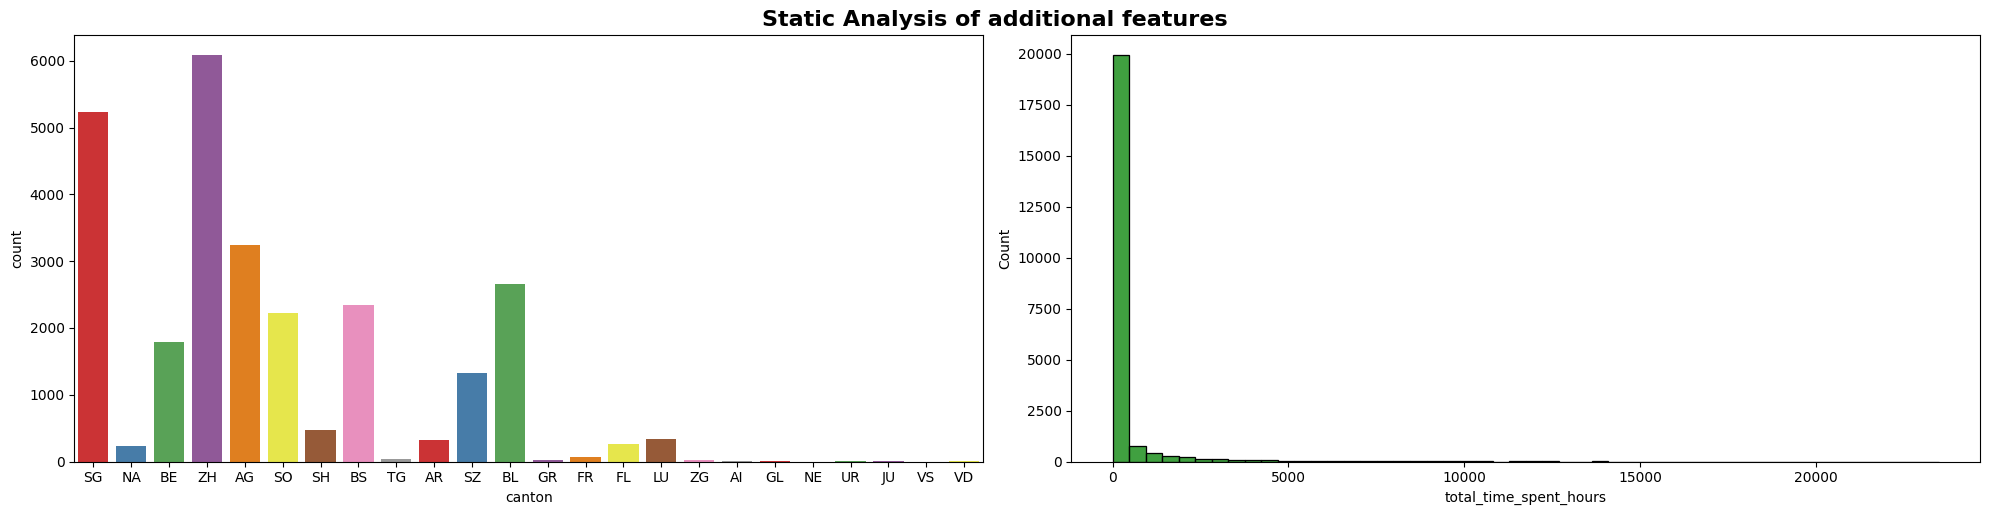

In [68]:
fig2 = plot_features(df_static_analysis_additional_features, "Static Analysis of additional features", figsize=(20, 5))




While the total time spent on the app, detached from the information about the user's canton, does not contribute to validating our hypothesis, the count of users per canton does provide some insights. The highest user counts are observed in the cantons of Zürich (ZH) and St. Gallen (SG), which align with our hypothesis. However, the presence of high user counts in Aargau (AG), Basel-Landschaft (BL), and Basel-Stadt (BS) contradicts the hypothesis, as these cantons do not have a mandatory entrance exam for gymnasium admission.

Overall, this univariate analysis does not provide conclusive evidence, as Zürich and St. Gallen are also among the most populated cantons in Switzerland. Therefore, it is necessary to combine multiple variables to generate a more insightful analysis that examines user behavior within each canton relative to its population size. A deeper investigation into the time spent per user per canton could help determine whether students from cantons with mandatory entrance exams engage more intensively with the app compared to those from other cantons.

e) Perform a multivariate analysis for two pairs of features of your choice. Please provide a metric and a visualization for both pairs. Please discuss: why did you choose these two pairs? What was your hypothesis? Do the results confirm your hypothesis?

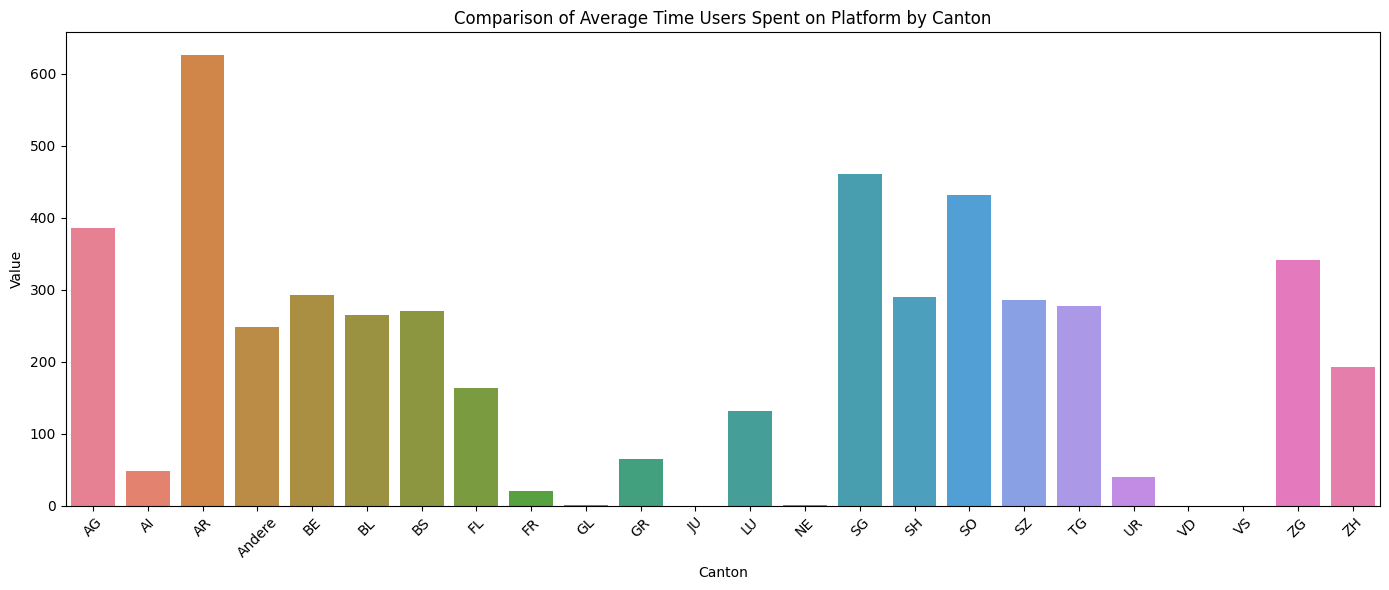

In [69]:
# Assuming df_static_analysis is already defined
metrics_to_plot = ['total_time_spent_hours']

# Aggregate data by canton
canton_metrics = df_static_analysis.groupby('canton').agg({
    'total_time_spent_hours': 'mean'
}).reset_index()

# Melt the DataFrame for Seaborn compatibility
melted_df = pd.melt(canton_metrics, id_vars=['canton'], value_vars=metrics_to_plot)

# Generate a unique color for each canton
unique_cantons = melted_df['canton'].unique()
custom_palette = sns.color_palette("husl", len(unique_cantons))

# Create a mapping from canton to color
canton_color_map = dict(zip(unique_cantons, custom_palette))

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(
    x='canton', 
    y='value', 
    hue='canton',  # Use 'canton' for different colors
    data=melted_df, 
    palette=canton_color_map
)

plt.title('Comparison of Average Time Users Spent on Platform by Canton')
plt.xlabel('Canton')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The presence of a mandatory gymnasium entrance exam appears to influence app usage, but it is not the sole determining factor. While the most active users are from Appenzell Ausserrhoden (AR) and St. Gallen (SG), other cantons without mandatory exams—such as Bern (BE), Basel-Landschaft (BL), Basel-Stadt (BS), Aargau (AG), Solothurn (SO), Schwyz (SZ), and Zug (ZG)—also show significant engagement.

This suggests that while mandatory entrance exams may drive higher app usage in some regions, other factors like as general academic culture, the competitiveness of school admissions, and regional differences in education policies—could also influence user engagement. A deeper multivariate analysis incorporating more features as for ex. population size, educational infrastructure, or socioeconomic factors would help provide a more comprehensive understanding of the trends observed

# Task 3: Time-Series Analysis

In the last task, you will perform a time-series analysis.


#### a) Build a data frame containing one row per user per week:

``[user_id, week, num_pages_visited, num_feedback, percentage_correct, num_clicks]``


The features are defined as follows:

- **num_pages_visited**: total number of pages a student visited 

- **num_feedback**: total number of times the student opened the feedback

- **percentage_correct**: number of correct answers/total number of answers (hint: evaluation = correct). If desired, you may assign a weight of 0.5 to partially correct answers. 

- **num_clicks**: total number of click events (hint: event_type = CLICK)

Where week 0 is the first week the specific user solved a task in the platform, i.e., the user's earliest entry in the transactions table.

Hint: You may extract the week of the year (dt.week) from the timestamps.

Hint 2: Be mindful that week 1 in 2022 is a different week from week 1 in 2023.

You can limit the number of weeks to 10, i.e. for each user we just look at the first 10 weeks of data.
You may change and justify your choice for the number of weeks.

In [70]:
# Your code for building the dataframe goes here
# Extract week information
events['date'] = pd.to_datetime(events['event_date'])

# Extract year and week information
events['year'] = events['date'].dt.year
events['week'] = events['date'].dt.isocalendar().week
events['year_week'] = events['date'].dt.strftime('%Y-%U') 

# Count number of page visits per user per week
num_pages_visited_week = (
    events[events["action"] == "PAGE_VISIT"]
    .groupby(["user_id", "year_week"])  # Group by user_id and week
    .size()
    .reset_index(name="NUM_PAGE_VISIT")
)

num_given_feedback_week = (
    events[events["action"] == "OPEN_FEEDBACK"]
    .groupby(["user_id", "year_week"])  # Group by user_id and week
    .size()
    .reset_index(name="NUM_OPEN_FEEDBACK")
)

transactions['date'] = pd.to_datetime(transactions['start_time'])  # Adjust column name as needed

# Extract year and week information
transactions['year'] = transactions['date'].dt.year
transactions['week'] = transactions['date'].dt.isocalendar().week
transactions['year_week'] = transactions['date'].dt.strftime('%Y-%U')  #

# num correct 
num_transaction_correct_weekly = (
    transactions[transactions["evaluation"] == "CORRECT"]
    .groupby(["user_id", "year_week"])
    .size()
    .reset_index(name="NUM_CORRECT")
)

num_transaction_total_weekly = (
    transactions[transactions["evaluation"].notna()]  # Exclude NaN answers
    .groupby(["user_id", "year_week"])
    .size()
    .reset_index(name="NUM_TOTAL")
)

num_transactions_weekly= num_transaction_correct_weekly.merge(num_transaction_total_weekly, on=["user_id", "year_week"], how="left")

num_transactions_weekly["PERCENTAGE_CORRECT"] = num_transactions_weekly["NUM_CORRECT"] / num_transactions_weekly["NUM_TOTAL"]

# Number of clicks per user per week
num_clicks_per_user_weekly = (
    events[events["event_type"] == "CLICK"]
    .groupby(["user_id", "year_week"])
    .size()
    .reset_index(name="NUM_CLICKS")
)

num_transactions_weekly.head()


,user_id,year_week,NUM_CORRECT,NUM_TOTAL,PERCENTAGE_CORRECT
0,387604,2021-39,1,2,0.500000
1,387604,2021-44,1,8,0.125000
2,387604,2021-45,9,25,0.360000
3,387604,2021-46,6,31,0.193548
4,387604,2021-50,5,17,0.294118


In [71]:
df_weekly_analysis = users.merge(num_clicks_per_user_weekly, on=['user_id'], how='left')
df_weekly_analysis = df_weekly_analysis.merge(num_pages_visited_week, on=['user_id', 'year_week'], how='left')
df_weekly_analysis = df_weekly_analysis.merge(num_given_feedback_week, on=['user_id', 'year_week'], how='left')
df_weekly_analysis = df_weekly_analysis.merge(num_transactions_weekly, on=['user_id', 'year_week'], how='left')

df_weekly_analysis = df_weekly_analysis.drop(columns=["canton", "class_level", "class_id", "study", "NUM_TOTAL", "NUM_CORRECT"])

df_weekly_analysis.head()


,user_id,gender,year_week,NUM_CLICKS,NUM_PAGE_VISIT,NUM_OPEN_FEEDBACK,PERCENTAGE_CORRECT
0,387604,NaN,2021-25,4.0,NaN,NaN,NaN
1,387604,NaN,2021-26,12.0,NaN,NaN,NaN
2,387604,NaN,2021-31,6.0,3.0,NaN,NaN
3,387604,NaN,2021-32,3.0,4.0,NaN,NaN
4,387604,NaN,2021-33,23.0,23.0,NaN,NaN


In [72]:
# Get unique year_week values and filter out NaN values
unique_weeks = df_weekly_analysis['year_week'].dropna().unique()

# Sort the weeks chronologically
sorted_weeks = sorted(unique_weeks)

# Get the first 10 weeks (or all if less than 10)
first_ten_weeks = sorted_weeks[:10]

# Filter the dataframe
df_first_ten_weeks = df_weekly_analysis[df_weekly_analysis['year_week'].isin(first_ten_weeks)]

df_first_ten_weeks.head()



,user_id,gender,year_week,NUM_CLICKS,NUM_PAGE_VISIT,NUM_OPEN_FEEDBACK,PERCENTAGE_CORRECT
0,387604,NaN,2021-25,4.0,NaN,NaN,NaN
1,387604,NaN,2021-26,12.0,NaN,NaN,NaN
51,387605,NaN,2021-21,7.0,NaN,NaN,0.666667
52,387605,NaN,2021-24,6.0,NaN,NaN,NaN
53,387605,NaN,2021-26,15.0,NaN,NaN,NaN


In [75]:
df_first_ten_weeks["year_week"].unique()

array(['2021-25', '2021-26', '2021-21', '2021-24', '2021-27', '2021-28',
       '2021-22', '2021-23', '2021-20', '2021-29'], dtype=object)

#### b) Select two features and analyze their behavior over time. Please provide a hypothesis and visualization for both features. For ideas on how to perform a time series exploration, please check the lecture slides and notebook. Discuss your results: what do you observe? Do the results confirm your hypotheses?

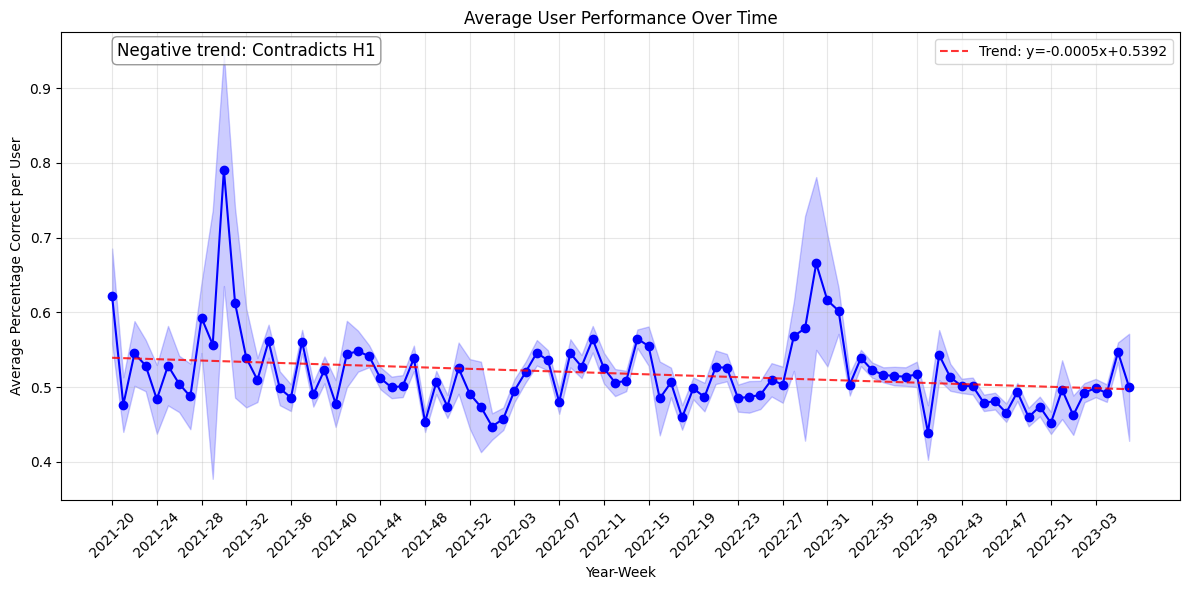

In [81]:
# H1: the avg number of correct answers from a user increases over time

user_weekly_avg = df_weekly_analysis.groupby(['user_id', 'year_week'])['PERCENTAGE_CORRECT'].mean().reset_index()

# Then, aggregate these user averages by week
weekly_correctness = user_weekly_avg.groupby('year_week')['PERCENTAGE_CORRECT'].agg(['mean', 'count', 'std']).reset_index()
weekly_correctness = weekly_correctness.sort_values('year_week')

# Calculate standard error
weekly_correctness['se'] = weekly_correctness['std'] / np.sqrt(weekly_correctness['count'])
weekly_correctness['ci_upper'] = weekly_correctness['mean'] + 1.96 * weekly_correctness['se']
weekly_correctness['ci_lower'] = weekly_correctness['mean'] - 1.96 * weekly_correctness['se']

# Plot
plt.figure(figsize=(12, 6))
plt.plot(weekly_correctness['year_week'], weekly_correctness['mean'], marker='o', linestyle='-', color='blue')
plt.fill_between(weekly_correctness['year_week'],
                weekly_correctness['ci_lower'],
                weekly_correctness['ci_upper'],
                alpha=0.2, color='blue')

# Add linear regression line
x = np.arange(len(weekly_correctness))
y = weekly_correctness['mean']
mask = ~np.isnan(y)
if sum(mask) > 1:  # Need at least 2 points for regression
    z = np.polyfit(x[mask], y[mask], 1)
    p = np.poly1d(z)
    plt.plot(weekly_correctness['year_week'], p(x), "r--", alpha=0.8,
            label=f"Trend: y={z[0]:.4f}x+{z[1]:.4f}")

plt.title('Average User Performance Over Time')
plt.xlabel('Year-Week')
plt.ylabel('Average Percentage Correct per User')
n = 4  # Show every 4th tick
plt.xticks(
    ticks=weekly_correctness['year_week'][::n],  # Select every nth tick
    labels=weekly_correctness['year_week'][::n],  # Use the same labels
    rotation=45
)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

# Add annotation about hypothesis
if sum(mask) > 1:
    if z[0] > 0:
        conclusion = "Positive trend: Supports H1"
    elif z[0] < 0:
        conclusion = "Negative trend: Contradicts H1"
    else:
        conclusion = "No trend: Contradicts H1"
    plt.annotate(conclusion, xy=(0.05, 0.95), xycoords='axes fraction', 
                 fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.show()



## Discussion H1

The average percentage of correct answers over time appears to show a slight downward trend, suggesting that users may become less accurate in their responses as they spend more time on the platform. Several potential explanations for this decline include:

    - Fatigue or Boredom: Users may experience cognitive fatigue or reduced motivation over time, leading to a lower accuracy rate.
    - Increasing Difficulty: As users progress through the platform, they may encounter increasingly difficult questions, which could naturally result in a lower percentage of correct answers.
    - User Turnover: The accuracy rate could be influenced by the continuous arrival of new users with potentially lower initial performance and the departure of - experienced users who might have maintained higher accuracy.
    - Learning Effects: Users may engage with more challenging question sets or experiment with different problem-solving strategies, leading to temporary fluctuations in accuracy.

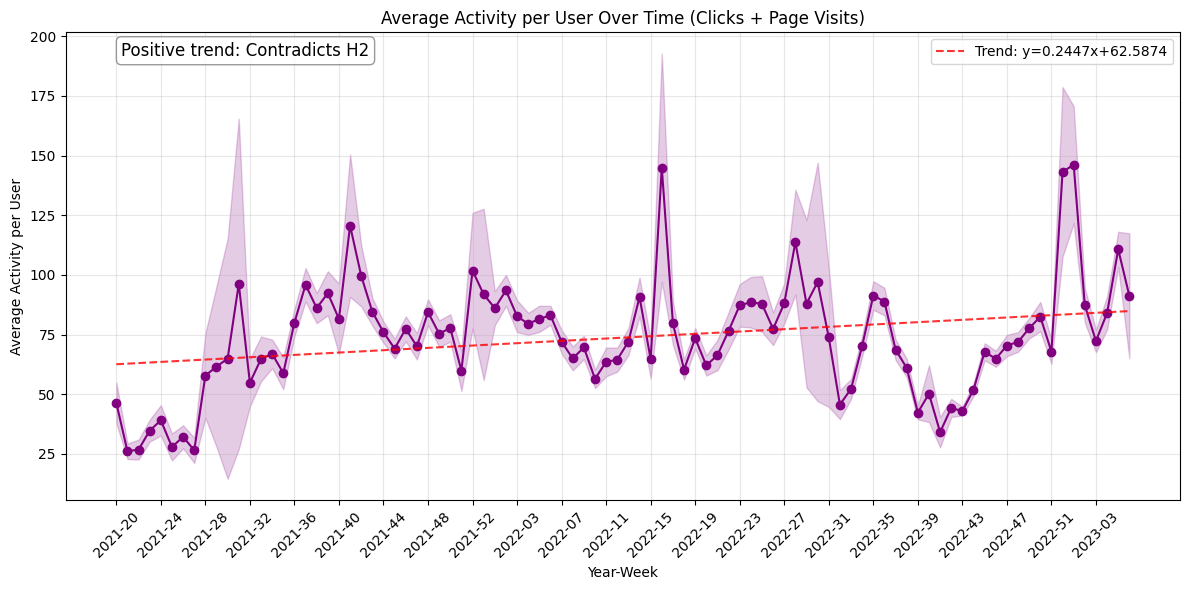

In [84]:
# We'll use NUM_CLICKS and NUM_PAGE_VISIT as proxies for time spent

# Calculate total activity (clicks + page visits) per user per week
df_weekly_analysis['total_activity'] = df_weekly_analysis['NUM_CLICKS'].fillna(0) + df_weekly_analysis['NUM_PAGE_VISIT'].fillna(0)

# First, calculate average activity for EACH USER in each week
user_weekly_activity = df_weekly_analysis.groupby(['user_id', 'year_week'])['total_activity'].mean().reset_index()

# Then, aggregate these user averages by week
weekly_activity = user_weekly_activity.groupby('year_week')['total_activity'].agg(['mean', 'count', 'std']).reset_index()
weekly_activity = weekly_activity.sort_values('year_week')

# Calculate standard error
weekly_activity['se'] = weekly_activity['std'] / np.sqrt(weekly_activity['count'])
weekly_activity['ci_upper'] = weekly_activity['mean'] + 1.96 * weekly_activity['se']
weekly_activity['ci_lower'] = weekly_activity['mean'] - 1.96 * weekly_activity['se']

# Plot
plt.figure(figsize=(12, 6))
plt.plot(weekly_activity['year_week'], weekly_activity['mean'], marker='o', linestyle='-', color='purple')
plt.fill_between(weekly_activity['year_week'],
                weekly_activity['ci_lower'],
                weekly_activity['ci_upper'],
                alpha=0.2, color='purple')

# Add linear regression line
x = np.arange(len(weekly_activity))
y = weekly_activity['mean']
mask = ~np.isnan(y)
if sum(mask) > 1:
    z = np.polyfit(x[mask], y[mask], 1)
    p = np.poly1d(z)
    plt.plot(weekly_activity['year_week'], p(x), "r--", alpha=0.8,
           label=f"Trend: y={z[0]:.4f}x+{z[1]:.4f}")

plt.title('Average Activity per User Over Time (Clicks + Page Visits)')
plt.xlabel('Year-Week')
plt.ylabel('Average Activity per User')

# Make sure we're using ticks from weekly_activity, not weekly_correctness
n = 4
plt.xticks(
    ticks=weekly_activity['year_week'][::n],  # Use weekly_activity, not weekly_correctness
    labels=weekly_activity['year_week'][::n],
    rotation=45
)

plt.grid(True, alpha=0.3)
plt.legend()

# Add annotation about hypothesis
if sum(mask) > 1:
    if z[0] < 0:
        conclusion = "Negative trend: Supports H2"
    elif z[0] > 0:
        conclusion = "Positive trend: Contradicts H2"
    else:
        conclusion = "No trend: Neither supports nor contradicts H2"
    plt.annotate(conclusion, xy=(0.05, 0.95), xycoords='axes fraction',
                fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()

## Discussion H2 (discussion of H1 above)

The average activity per user fluctuates significantly, likely influenced by external factors such as holidays and exam periods, where some users engage more while others reduce their activity. These seasonal patterns contribute to the observed volatility in the data.

Despite these fluctuations, the overall trend is positive, indicating an increase in user engagement over time. The linear equation y = 0.2447x + 62.5874 suggests a gradual weekly increase of 0.2447 in activity, implying that users are interacting more with the platform as time progresses. This could be due to greater familiarity with the interface, improved problem-solving skills, or increased interest in the content. Additionally, factors like academic cycles, platform updates, or promotional events might be driving these engagement patterns.

This contradicts Hypothesis H2, which predicted a decline in activity. Instead, the data suggests that:

    -The user base may be expanding, leading to more interactions.
    -Engagement strategies or platform improvements could be encouraging users to stay active.
    -External influences, such as educational trends or global events, might be shaping user behavior differently than expected. (Holidays, Exams etc.)

Overall, the increasing trend in user activity highlights a growing level of engagement, reinforcing the need for further investigation into the factors that drive participation and sustain long-term user interest.



# Task 4: Creative extension 

Please provide **one** new hypothesis you would like to explore with the data and provide a visualization for it. Discuss your results: what do you observe? Do the results confirm your hypotheses?



Found gender categories: ['FEMALE' 'MALE' 'STAR']


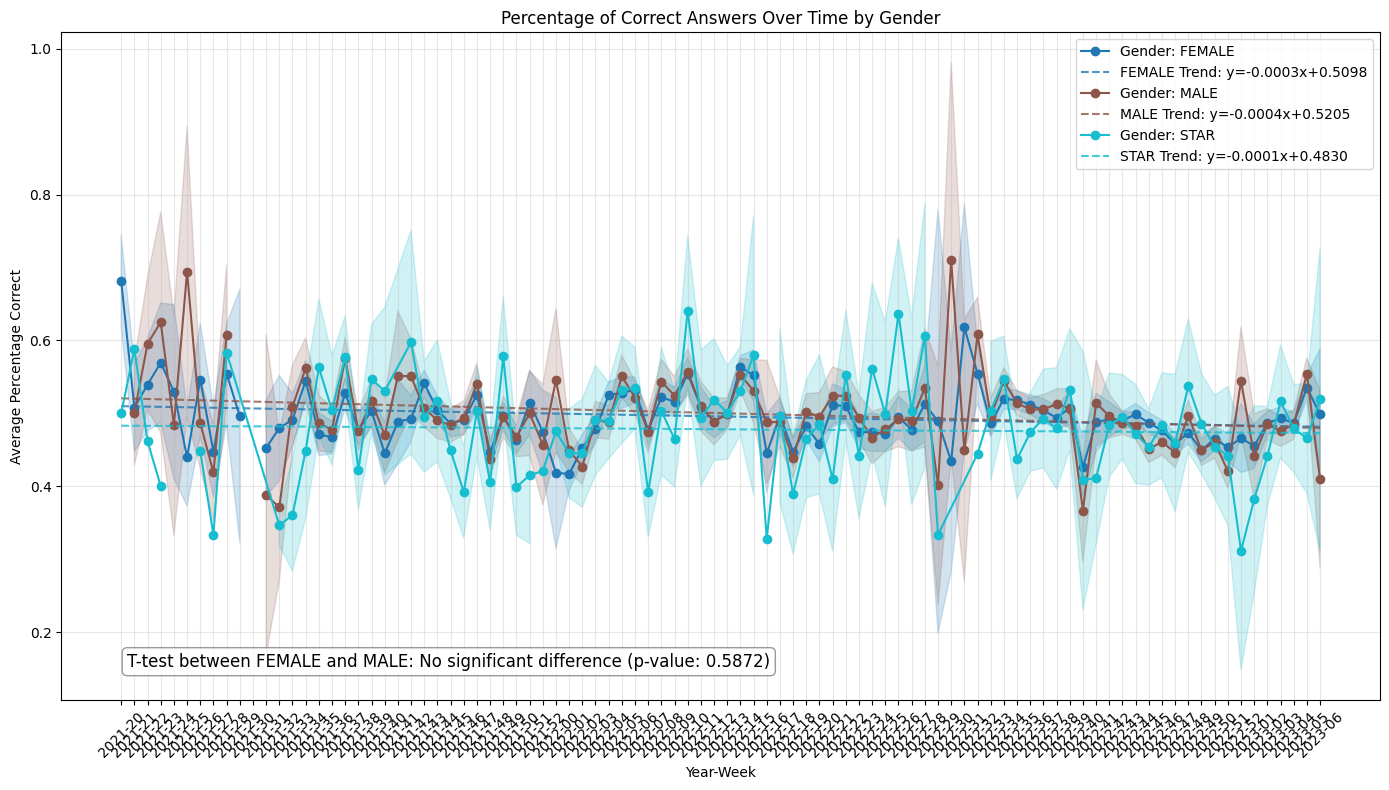

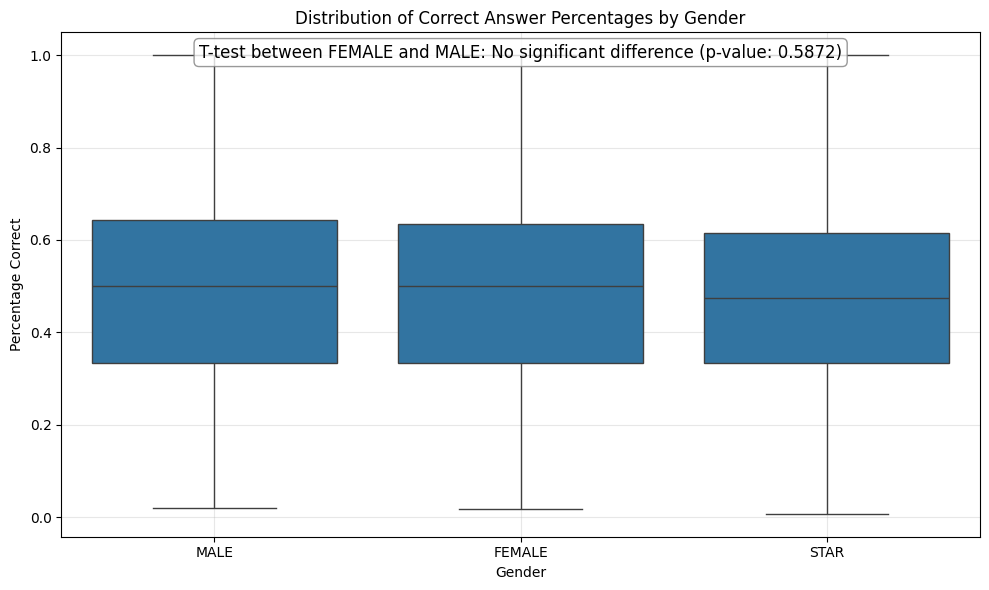

In [114]:
# H3: There is no siginificant difference in correct answers over time between genders

# Aggregate data by gender and week
gender_weekly_correctness = df_weekly_analysis.groupby(['gender', 'year_week'])['PERCENTAGE_CORRECT'].agg(['mean', 'count', 'std']).reset_index()

# Filter out NaN values
gender_weekly_correctness = gender_weekly_correctness[~gender_weekly_correctness['gender'].isna()]

# Calculate standard error
gender_weekly_correctness['se'] = gender_weekly_correctness['std'] / np.sqrt(gender_weekly_correctness['count'])
gender_weekly_correctness['ci_upper'] = gender_weekly_correctness['mean'] + 1.96 * gender_weekly_correctness['se']
gender_weekly_correctness['ci_lower'] = gender_weekly_correctness['mean'] - 1.96 * gender_weekly_correctness['se']

# Create the visualization
plt.figure(figsize=(14, 8))

# Get unique genders
genders = gender_weekly_correctness['gender'].unique()
print(f"Found gender categories: {genders}")

# Use a colormap to generate colors based on the number of genders
colors = plt.cm.tab10(np.linspace(0, 1, len(genders)))

# Plot each gender
for i, gender in enumerate(genders):
    gender_data = gender_weekly_correctness[gender_weekly_correctness['gender'] == gender].sort_values('year_week')
    
    # Check if there's any data for this gender
    if len(gender_data) == 0:
        print(f"No data available for gender: {gender}")
        continue
    
    plt.plot(gender_data['year_week'], gender_data['mean'], 
             marker='o', linestyle='-', color=colors[i], 
             label=f'Gender: {gender}')
    
    plt.fill_between(gender_data['year_week'], 
                     gender_data['ci_lower'], 
                     gender_data['ci_upper'], 
                     alpha=0.2, color=colors[i])
    
    # Add linear regression line for each gender
    if len(gender_data) > 1:
        x = np.arange(len(gender_data))
        y = gender_data['mean']
        mask = ~np.isnan(y)
        if sum(mask) > 1:
            z = np.polyfit(x[mask], y[mask], 1)
            p = np.poly1d(z)
            plt.plot(gender_data['year_week'], p(x), "--", color=colors[i], alpha=0.8,
                    label=f"{gender} Trend: y={z[0]:.4f}x+{z[1]:.4f}")

# Prepare for statistical test - collect data for different genders
gender_means = {gender: gender_weekly_correctness[gender_weekly_correctness['gender'] == gender]['mean'].dropna() 
                for gender in genders}

# Add statistical test result annotation if we have at least two genders with data
p_value_text = ""
if len(genders) >= 2:
    # Find the two genders with most data points
    valid_genders = [g for g in genders if len(gender_means[g]) > 0]
    if len(valid_genders) >= 2:
        g1, g2 = valid_genders[0], valid_genders[1]
        # Perform t-test
        t_stat, p_value = stats.ttest_ind(gender_means[g1], gender_means[g2], nan_policy='omit')
        significance = "Significant difference" if p_value < 0.05 else "No significant difference"
        p_value_text = f"T-test between {g1} and {g2}: {significance} (p-value: {p_value:.4f})"

# Style the plot
plt.title('Percentage of Correct Answers Over Time by Gender')
plt.xlabel('Year-Week')
plt.ylabel('Average Percentage Correct')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()

# Add annotation about hypothesis
if p_value_text:
    plt.annotate(p_value_text, xy=(0.05, 0.05), xycoords='axes fraction', 
                 fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()

# Create a box plot to compare overall performance by gender
valid_data = df_weekly_analysis.dropna(subset=['gender', 'PERCENTAGE_CORRECT'])
if len(valid_data) > 0:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='gender', y='PERCENTAGE_CORRECT', data=valid_data)
    plt.title('Distribution of Correct Answer Percentages by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Percentage Correct')
    plt.grid(True, alpha=0.3)

    # Add statistical annotation
    if p_value_text:
        plt.annotate(p_value_text, xy=(0.5, 0.95), xycoords='axes fraction', ha='center',
                    fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()

Our analysis suggests that gender does not significantly impact the percentage of correct answers. The box plot clearly shows that the distributions for male, female, and "star" users are similar, with overlapping medians and interquartile ranges.

The time series plot further supports this observation. While there is some initial variability, the trend lines for each gender eventually converge and remain closely aligned over time. This indicates that any early differences even out, reinforcing the idea that gender does not influence performance in the long run.

From a statistical perspective, our t-test confirms this result. The p-value of 0.5872 (≈59%) indicates that the difference between male and female users' performance is not statistically significant. Since this value is well above the typical significance threshold (e.g., 5%), we fail to reject the null hypothesis—meaning there is no evidence that gender affects performance.